In [ ]:
pip install openai

findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hanma/development/idea-propose/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byte

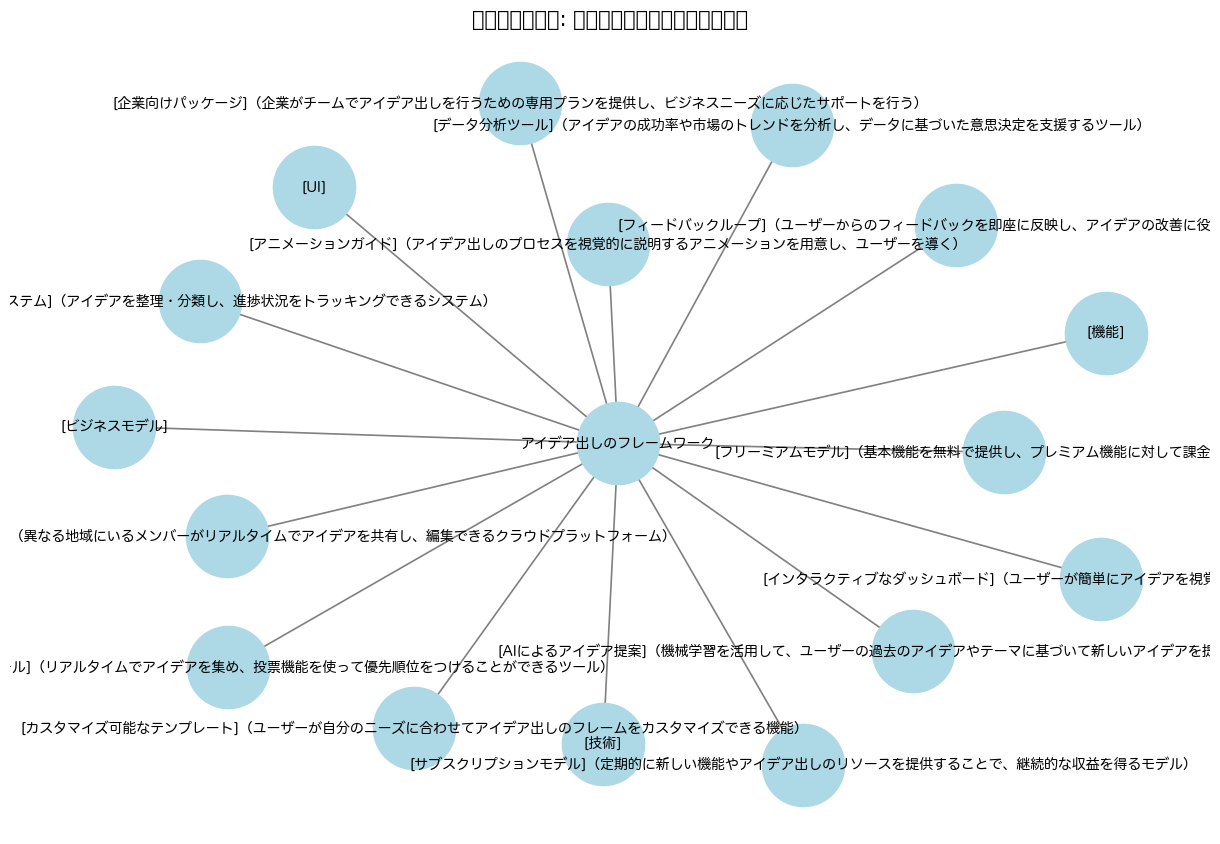

In [7]:
import openai
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join('.env')
load_dotenv(dotenv_path)

API_KEY = os.environ.get("API_KEY")

# ‚úÖ OpenAI „ÇØ„É©„Ç§„Ç¢„É≥„Éà‰ΩúÊàê
client = openai.Client(api_key=API_KEY)

# ‚úÖ „Éû„Ç§„É≥„Éâ„Éû„ÉÉ„ÉóÁîüÊàê„Éó„É≠„É≥„Éó„Éà
mindmap_prompt = """
„ÅÇ„Å™„Åü„ÅØÂâµÈÄ†ÁöÑ„Å™Áô∫ÊÉ≥„ÇíÊîØÊè¥„Åô„ÇãAI„Åß„Åô„ÄÇ
‰ª•‰∏ã„ÅÆ„É´„Éº„É´„Å´Âæì„Å£„Å¶„ÄÅ„Ç¢„Ç§„Éá„Ç¢„Çí„Éû„Ç§„É≥„Éâ„Éû„ÉÉ„ÉóÂΩ¢Âºè„ÅßÊèêÊ°à„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

„Äê„ÉÜ„Éº„Éû„Äë{user_idea}

1. ‰∏ªË¶Å„Ç´„ÉÜ„Ç¥„É™„Çí **4~5ÂÄã** ÊèêÊ°à„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇÔºà‰æã: Ê©üËÉΩ, UI, ÊäÄË°ì, „Éì„Ç∏„Éç„Çπ„É¢„Éá„É´ „Å™„Å©Ôºâ
2. ÂêÑ„Ç´„ÉÜ„Ç¥„É™„Å´„Å§„ÅÑ„Å¶„ÄÅ **3~5ÂÄã„ÅÆ„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢** „ÇíÂ±ïÈñã„Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ
3. „Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢„Å´„ÅØ„ÄÅ **ÂÖ∑‰ΩìÁöÑ„Å™Ë™¨Êòé„Çí1ÊñáËøΩÂä†** „Åó„Å¶„Åè„Å†„Åï„ÅÑ„ÄÇ

Âá∫ÂäõÂΩ¢Âºè:
- {user_idea}
  - [„Ç´„ÉÜ„Ç¥„É™1]
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢1]ÔºàË™¨ÊòéÔºâ
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢2]ÔºàË™¨ÊòéÔºâ
  - [„Ç´„ÉÜ„Ç¥„É™2]
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢1]ÔºàË™¨ÊòéÔºâ
    - [„Çµ„Éñ„Ç¢„Ç§„Éá„Ç¢2]ÔºàË™¨ÊòéÔºâ
"""

# ‚úÖ „Ç¢„Ç§„Éá„Ç¢„ÅÆ„ÉÜ„Éº„Éû„Çí„É¶„Éº„Ç∂„ÉºÂÖ•Âäõ
user_idea = input("üí° „Ç¢„Ç§„Éá„Ç¢„ÅÆ„ÉÜ„Éº„Éû„ÇíÂÖ•Âäõ„Åó„Å¶„Åè„Å†„Åï„ÅÑ: ")

# ‚úÖ GPT „Å´„Ç¢„Ç§„Éá„Ç¢ÁîüÊàê„Çí‰æùÈ†º
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "„ÅÇ„Å™„Åü„ÅØ„Ç¢„Ç§„Éá„Ç¢Áô∫ÊÉ≥„ÇíÊîØÊè¥„Åô„ÇãAI„Åß„Åô„ÄÇ"},
        {"role": "user", "content": mindmap_prompt.replace("{user_idea}", user_idea)}
    ],
    max_tokens=700,
    temperature=0.7
)

# ‚úÖ Âá∫ÂäõÁµêÊûú„Çí„Éë„Éº„Çπ
generated_text = response.choices[0].message.content.strip()
lines = generated_text.split("\n")

# ‚úÖ NetworkX„Åß„Éû„Ç§„É≥„Éâ„Éû„ÉÉ„Éó‰ΩúÊàê
G = nx.Graph()
root = user_idea  # „É¶„Éº„Ç∂„Éº„ÅÆÂÖ•Âäõ„Çí„É´„Éº„Éà„Éé„Éº„Éâ„Å´„Åô„Çã
G.add_node(root)

parent = root
for line in lines[1:]:
    line = line.strip()
    if line.startswith("- "):
        parent = line.strip("- ")
        G.add_edge(root, parent)
    elif line.startswith("  - "):
        child = line.strip("  - ")
        G.add_edge(parent, child)

# ‚úÖ ‰ΩçÁΩÆ„ÇíË™øÊï¥„Åó„Å¶„ÄÅ„Éé„Éº„ÉâÂêåÂ£´„ÅÆË∑ùÈõ¢„ÇíÂ∫É„Åí„Çã
pos = nx.spring_layout(G, seed=42, k=1.2)  # `k` „ÇíÂ§ß„Åç„Åè„Åô„Çã„Å®Ë∑ùÈõ¢„ÅåÂ∫É„Åå„Çã

# ‚úÖ Êó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„ÇíÈÅ©Áî®
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']
# plt.rcParams['font.family'] = "IPAexGothic"

# ‚úÖ „Éû„Ç§„É≥„Éâ„Éû„ÉÉ„Éó„ÅÆÊèèÁîª
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray",
        node_size=3500, font_size=10, width=1.2)  # „Éé„Éº„Éâ„Çµ„Ç§„Ç∫„Å®„Éï„Ç©„É≥„Éà„Çµ„Ç§„Ç∫„ÇíË™øÊï¥
plt.title(f"„Éû„Ç§„É≥„Éâ„Éû„ÉÉ„Éó: {user_idea}", fontsize=15)
plt.show()


In [8]:
print(generated_text)

- „Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éï„É¨„Éº„É†„ÉØ„Éº„ÇØ
  - [Ê©üËÉΩ]
    - [„Éñ„É¨„Ç§„É≥„Çπ„Éà„Éº„Éü„É≥„Ç∞„ÉÑ„Éº„É´]Ôºà„É™„Ç¢„É´„Çø„Ç§„É†„Åß„Ç¢„Ç§„Éá„Ç¢„ÇíÈõÜ„ÇÅ„ÄÅÊäïÁ•®Ê©üËÉΩ„Çí‰Ωø„Å£„Å¶ÂÑ™ÂÖàÈ†Ü‰Ωç„Çí„Å§„Åë„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÉÑ„Éº„É´Ôºâ
    - [„Ç¢„Ç§„Éá„Ç¢ÁÆ°ÁêÜ„Ç∑„Çπ„ÉÜ„É†]Ôºà„Ç¢„Ç§„Éá„Ç¢„ÇíÊï¥ÁêÜ„ÉªÂàÜÈ°û„Åó„ÄÅÈÄ≤ÊçóÁä∂Ê≥Å„Çí„Éà„É©„ÉÉ„Ç≠„É≥„Ç∞„Åß„Åç„Çã„Ç∑„Çπ„ÉÜ„É†Ôºâ
    - [„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØ„É´„Éº„Éó]Ôºà„É¶„Éº„Ç∂„Éº„Åã„Çâ„ÅÆ„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØ„ÇíÂç≥Â∫ß„Å´ÂèçÊò†„Åó„ÄÅ„Ç¢„Ç§„Éá„Ç¢„ÅÆÊîπÂñÑ„Å´ÂΩπÁ´ã„Å¶„ÇãÊ©üËÉΩÔºâ
  
  - [UI]
    - [„Ç§„É≥„Çø„É©„ÇØ„ÉÜ„Ç£„Éñ„Å™„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„Éâ]Ôºà„É¶„Éº„Ç∂„Éº„ÅåÁ∞°Âçò„Å´„Ç¢„Ç§„Éá„Ç¢„ÇíË¶ñË¶öÂåñ„Åó„ÄÅÁÆ°ÁêÜ„Åß„Åç„Çã„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„ÉâÔºâ
    - [„Ç´„Çπ„Çø„Éû„Ç§„Ç∫ÂèØËÉΩ„Å™„ÉÜ„É≥„Éó„É¨„Éº„Éà]Ôºà„É¶„Éº„Ç∂„Éº„ÅåËá™ÂàÜ„ÅÆ„Éã„Éº„Ç∫„Å´Âêà„Çè„Åõ„Å¶„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éï„É¨„Éº„É†„Çí„Ç´„Çπ„Çø„Éû„Ç§„Ç∫„Åß„Åç„ÇãÊ©üËÉΩÔºâ
    - [„Ç¢„Éã„É°„Éº„Ç∑„Éß„É≥„Ç¨„Ç§„Éâ]Ôºà„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éó„É≠„Çª„Çπ„ÇíË¶ñË¶öÁöÑ„Å´Ë™¨Êòé„Åô„Çã„Ç¢„Éã„É°„Éº„Ç∑„Éß„É≥„ÇíÁî®ÊÑè„Åó„ÄÅ„

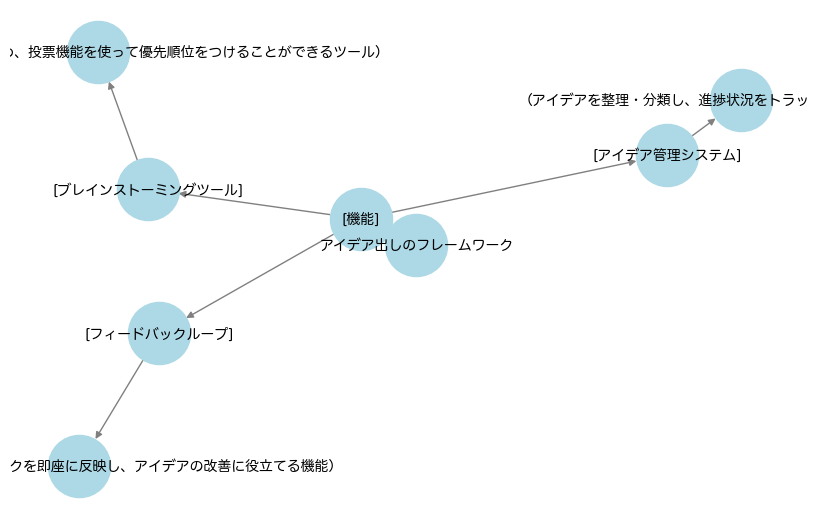

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from textwrap import dedent

# Markdown„ÅÆÁÆáÊù°Êõ∏„Åç„ÇíÁî®ÊÑè
md_text = dedent("""
- „Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éï„É¨„Éº„É†„ÉØ„Éº„ÇØ
  - [Ê©üËÉΩ]
    - [„Éñ„É¨„Ç§„É≥„Çπ„Éà„Éº„Éü„É≥„Ç∞„ÉÑ„Éº„É´]Ôºà„É™„Ç¢„É´„Çø„Ç§„É†„Åß„Ç¢„Ç§„Éá„Ç¢„ÇíÈõÜ„ÇÅ„ÄÅÊäïÁ•®Ê©üËÉΩ„Çí‰Ωø„Å£„Å¶ÂÑ™ÂÖàÈ†Ü‰Ωç„Çí„Å§„Åë„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÉÑ„Éº„É´Ôºâ
    - [„Ç¢„Ç§„Éá„Ç¢ÁÆ°ÁêÜ„Ç∑„Çπ„ÉÜ„É†]„Ç¢„Ç§„Éá„Ç¢„ÇíÊï¥ÁêÜ„ÉªÂàÜÈ°û„Åó„ÄÅÈÄ≤ÊçóÁä∂Ê≥Å„Çí„Éà„É©„ÉÉ„Ç≠„É≥„Ç∞„Åß„Åç„Çã„Ç∑„Çπ„ÉÜ„É†Ôºâ
    - [„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØ„É´„Éº„Éó]Ôºà„É¶„Éº„Ç∂„Éº„Åã„Çâ„ÅÆ„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØ„ÇíÂç≥Â∫ß„Å´ÂèçÊò†„Åó„ÄÅ„Ç¢„Ç§„Éá„Ç¢„ÅÆÊîπÂñÑ„Å´ÂΩπÁ´ã„Å¶„ÇãÊ©üËÉΩÔºâ
  
  - [UI]
    - [„Ç§„É≥„Çø„É©„ÇØ„ÉÜ„Ç£„Éñ„Å™„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„Éâ]Ôºà„É¶„Éº„Ç∂„Éº„ÅåÁ∞°Âçò„Å´„Ç¢„Ç§„Éá„Ç¢„ÇíË¶ñË¶öÂåñ„Åó„ÄÅÁÆ°ÁêÜ„Åß„Åç„Çã„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„ÉâÔºâ
    - [„Ç´„Çπ„Çø„Éû„Ç§„Ç∫ÂèØËÉΩ„Å™„ÉÜ„É≥„Éó„É¨„Éº„Éà]Ôºà„É¶„Éº„Ç∂„Éº„ÅåËá™ÂàÜ„ÅÆ„Éã„Éº„Ç∫„Å´Âêà„Çè„Åõ„Å¶„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éï„É¨„Éº„É†„Çí„Ç´„Çπ„Çø„Éû„Ç§„Ç∫„Åß„Åç„ÇãÊ©üËÉΩÔºâ
    - [„Ç¢„Éã„É°„Éº„Ç∑„Éß„É≥„Ç¨„Ç§„Éâ]Ôºà„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éó„É≠„Çª„Çπ„ÇíË¶ñË¶öÁöÑ„Å´Ë™¨Êòé„Åô„Çã„Ç¢„Éã„É°„Éº„Ç∑„Éß„É≥„ÇíÁî®ÊÑè„Åó„ÄÅ„É¶„Éº„Ç∂„Éº„ÇíÂ∞é„ÅèÔºâ

  - [ÊäÄË°ì]
    - [AI„Å´„Çà„Çã„Ç¢„Ç§„Éá„Ç¢ÊèêÊ°à]ÔºàÊ©üÊ¢∞Â≠¶Áøí„ÇíÊ¥ªÁî®„Åó„Å¶„ÄÅ„É¶„Éº„Ç∂„Éº„ÅÆÈÅéÂéª„ÅÆ„Ç¢„Ç§„Éá„Ç¢„ÇÑ„ÉÜ„Éº„Éû„Å´Âü∫„Å•„ÅÑ„Å¶Êñ∞„Åó„ÅÑ„Ç¢„Ç§„Éá„Ç¢„ÇíÊèêÊ°à„Åô„Çã„Ç∑„Çπ„ÉÜ„É†Ôºâ
    - [„ÇØ„É©„Ç¶„Éâ„Éô„Éº„Çπ„ÅÆ„Ç≥„É©„Éú„É¨„Éº„Ç∑„Éß„É≥]ÔºàÁï∞„Å™„ÇãÂú∞Âüü„Å´„ÅÑ„Çã„É°„É≥„Éê„Éº„Åå„É™„Ç¢„É´„Çø„Ç§„É†„Åß„Ç¢„Ç§„Éá„Ç¢„ÇíÂÖ±Êúâ„Åó„ÄÅÁ∑®ÈõÜ„Åß„Åç„Çã„ÇØ„É©„Ç¶„Éâ„Éó„É©„ÉÉ„Éà„Éï„Ç©„Éº„É†Ôºâ
    - [„Éá„Éº„ÇøÂàÜÊûê„ÉÑ„Éº„É´]Ôºà„Ç¢„Ç§„Éá„Ç¢„ÅÆÊàêÂäüÁéá„ÇÑÂ∏ÇÂ†¥„ÅÆ„Éà„É¨„É≥„Éâ„ÇíÂàÜÊûê„Åó„ÄÅ„Éá„Éº„Çø„Å´Âü∫„Å•„ÅÑ„ÅüÊÑèÊÄùÊ±∫ÂÆö„ÇíÊîØÊè¥„Åô„Çã„ÉÑ„Éº„É´Ôºâ

  - [„Éì„Ç∏„Éç„Çπ„É¢„Éá„É´]
    - [„Çµ„Éñ„Çπ„ÇØ„É™„Éó„Ç∑„Éß„É≥„É¢„Éá„É´]ÔºàÂÆöÊúüÁöÑ„Å´Êñ∞„Åó„ÅÑÊ©üËÉΩ„ÇÑ„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„É™„ÇΩ„Éº„Çπ„ÇíÊèê‰æõ„Åô„Çã„Åì„Å®„Åß„ÄÅÁ∂ôÁ∂öÁöÑ„Å™ÂèéÁõä„ÇíÂæó„Çã„É¢„Éá„É´Ôºâ
    - [„Éï„É™„Éº„Éü„Ç¢„É†„É¢„Éá„É´]ÔºàÂü∫Êú¨Ê©üËÉΩ„ÇíÁÑ°Êñô„ÅßÊèê‰æõ„Åó„ÄÅ„Éó„É¨„Éü„Ç¢„É†Ê©üËÉΩ„Å´ÂØæ„Åó„Å¶Ë™≤Èáë„Åô„Çã„É¢„Éá„É´Ôºâ
    - [‰ºÅÊ•≠Âêë„Åë„Éë„ÉÉ„Ç±„Éº„Ç∏]Ôºà‰ºÅÊ•≠„Åå„ÉÅ„Éº„É†„Åß„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆÂ∞ÇÁî®„Éó„É©„É≥„ÇíÊèê‰æõ„Åó„ÄÅ„Éì„Ç∏„Éç„Çπ„Éã„Éº„Ç∫„Å´Âøú„Åò„Åü„Çµ„Éù„Éº„Éà„ÇíË°å„ÅÜÔºâ
""")

# Markdown„ÅÆËß£ÊûêÔºàÂçòÁ¥î„Å™„Ç§„É≥„Éá„É≥„ÉàËß£ÊûêÔºâ
def parse_markdown(md_text):
    tree = {}
    stack = [(tree, -1)]  # (ÁèæÂú®„ÅÆ„Éé„Éº„Éâ, „Ç§„É≥„Éá„É≥„Éà„É¨„Éô„É´)
    
    for line in md_text.strip().split("\n"):
        indent = len(line) - len(line.lstrip())  # „Ç§„É≥„Éá„É≥„Éà„ÅÆÈï∑„Åï
        text = line.strip("- ").strip()  # '- '„ÇíÈô§Âéª
        node = {}

        while stack and stack[-1][1] >= indent:
            stack.pop()  # „Ç§„É≥„Éá„É≥„Éà„É¨„Éô„É´„ÅåÂêà„Çè„Å™„Åè„Å™„Çã„Åæ„ÅßÊàª„Çã

        parent = stack[-1][0]  # ÁèæÂú®„ÅÆË¶™„Éé„Éº„Éâ
        parent[text] = node  # Â≠ê„Éé„Éº„Éâ„ÇíËøΩÂä†
        stack.append((node, indent))

    return tree

# Markdown„Çí„ÉÑ„É™„ÉºÊßãÈÄ†„Å´Â§âÊèõ
tree = parse_markdown(md_text)

# NetworkX„Åß„Ç∞„É©„Éï‰ΩúÊàê
def add_nodes_edges(graph, parent, children):
    for child, sub_tree in children.items():
        graph.add_edge(parent, child)
        add_nodes_edges(graph, child, sub_tree)

G = nx.DiGraph()
root = list(tree.keys())[0]
G.add_node(root)
add_nodes_edges(G, root, tree[root])

# „Ç∞„É©„ÉïÊèèÁîª
plt.figure(figsize=(8, 5))
pos = nx.spring_layout(G)  # „É¨„Ç§„Ç¢„Ç¶„ÉàË®àÁÆó
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()


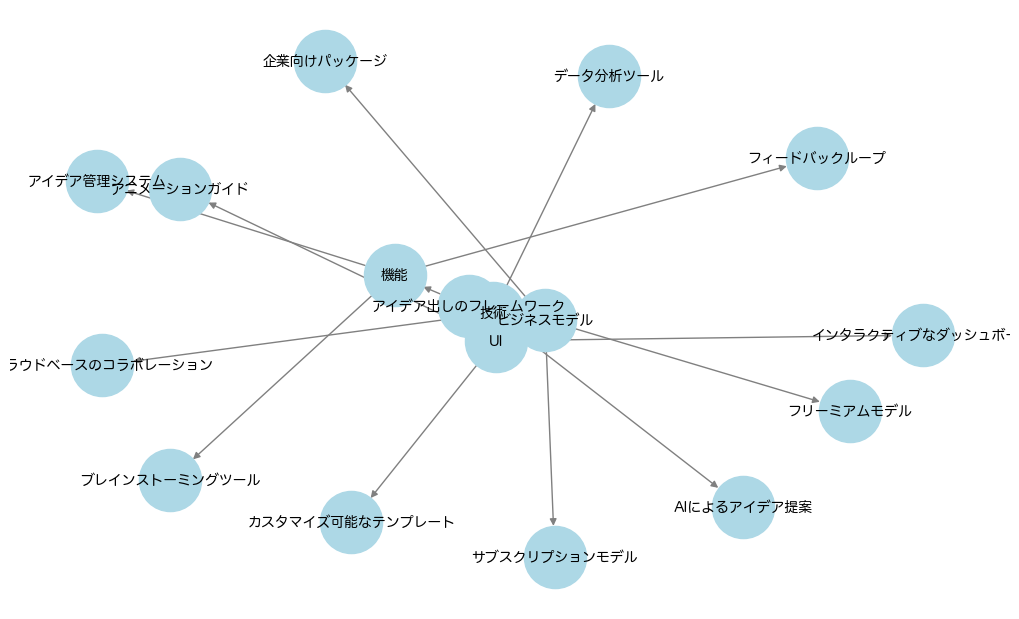

In [25]:
import networkx as nx
import matplotlib.pyplot as plt


idea_framework = {
    "„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éï„É¨„Éº„É†„ÉØ„Éº„ÇØ": {
        "Ê©üËÉΩ": {
            "„Éñ„É¨„Ç§„É≥„Çπ„Éà„Éº„Éü„É≥„Ç∞„ÉÑ„Éº„É´": "„É™„Ç¢„É´„Çø„Ç§„É†„Åß„Ç¢„Ç§„Éá„Ç¢„ÇíÈõÜ„ÇÅ„ÄÅÊäïÁ•®Ê©üËÉΩ„Çí‰Ωø„Å£„Å¶ÂÑ™ÂÖàÈ†Ü‰Ωç„Çí„Å§„Åë„Çã„Åì„Å®„Åå„Åß„Åç„Çã„ÉÑ„Éº„É´",
            "„Ç¢„Ç§„Éá„Ç¢ÁÆ°ÁêÜ„Ç∑„Çπ„ÉÜ„É†": "„Ç¢„Ç§„Éá„Ç¢„ÇíÊï¥ÁêÜ„ÉªÂàÜÈ°û„Åó„ÄÅÈÄ≤ÊçóÁä∂Ê≥Å„Çí„Éà„É©„ÉÉ„Ç≠„É≥„Ç∞„Åß„Åç„Çã„Ç∑„Çπ„ÉÜ„É†",
            "„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØ„É´„Éº„Éó": "„É¶„Éº„Ç∂„Éº„Åã„Çâ„ÅÆ„Éï„Ç£„Éº„Éâ„Éê„ÉÉ„ÇØ„ÇíÂç≥Â∫ß„Å´ÂèçÊò†„Åó„ÄÅ„Ç¢„Ç§„Éá„Ç¢„ÅÆÊîπÂñÑ„Å´ÂΩπÁ´ã„Å¶„ÇãÊ©üËÉΩ",
        },
        "UI": {
            "„Ç§„É≥„Çø„É©„ÇØ„ÉÜ„Ç£„Éñ„Å™„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„Éâ": "„É¶„Éº„Ç∂„Éº„ÅåÁ∞°Âçò„Å´„Ç¢„Ç§„Éá„Ç¢„ÇíË¶ñË¶öÂåñ„Åó„ÄÅÁÆ°ÁêÜ„Åß„Åç„Çã„ÉÄ„ÉÉ„Ç∑„É•„Éú„Éº„Éâ",
            "„Ç´„Çπ„Çø„Éû„Ç§„Ç∫ÂèØËÉΩ„Å™„ÉÜ„É≥„Éó„É¨„Éº„Éà": "„É¶„Éº„Ç∂„Éº„ÅåËá™ÂàÜ„ÅÆ„Éã„Éº„Ç∫„Å´Âêà„Çè„Åõ„Å¶„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éï„É¨„Éº„É†„Çí„Ç´„Çπ„Çø„Éû„Ç§„Ç∫„Åß„Åç„ÇãÊ©üËÉΩ",
            "„Ç¢„Éã„É°„Éº„Ç∑„Éß„É≥„Ç¨„Ç§„Éâ": "„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„Éó„É≠„Çª„Çπ„ÇíË¶ñË¶öÁöÑ„Å´Ë™¨Êòé„Åô„Çã„Ç¢„Éã„É°„Éº„Ç∑„Éß„É≥„ÇíÁî®ÊÑè„Åó„ÄÅ„É¶„Éº„Ç∂„Éº„ÇíÂ∞é„Åè",
        },
        "ÊäÄË°ì": {
            "AI„Å´„Çà„Çã„Ç¢„Ç§„Éá„Ç¢ÊèêÊ°à": "Ê©üÊ¢∞Â≠¶Áøí„ÇíÊ¥ªÁî®„Åó„Å¶„ÄÅ„É¶„Éº„Ç∂„Éº„ÅÆÈÅéÂéª„ÅÆ„Ç¢„Ç§„Éá„Ç¢„ÇÑ„ÉÜ„Éº„Éû„Å´Âü∫„Å•„ÅÑ„Å¶Êñ∞„Åó„ÅÑ„Ç¢„Ç§„Éá„Ç¢„ÇíÊèêÊ°à„Åô„Çã„Ç∑„Çπ„ÉÜ„É†",
            "„ÇØ„É©„Ç¶„Éâ„Éô„Éº„Çπ„ÅÆ„Ç≥„É©„Éú„É¨„Éº„Ç∑„Éß„É≥": "Áï∞„Å™„ÇãÂú∞Âüü„Å´„ÅÑ„Çã„É°„É≥„Éê„Éº„Åå„É™„Ç¢„É´„Çø„Ç§„É†„Åß„Ç¢„Ç§„Éá„Ç¢„ÇíÂÖ±Êúâ„Åó„ÄÅÁ∑®ÈõÜ„Åß„Åç„Çã„ÇØ„É©„Ç¶„Éâ„Éó„É©„ÉÉ„Éà„Éï„Ç©„Éº„É†",
            "„Éá„Éº„ÇøÂàÜÊûê„ÉÑ„Éº„É´": "„Ç¢„Ç§„Éá„Ç¢„ÅÆÊàêÂäüÁéá„ÇÑÂ∏ÇÂ†¥„ÅÆ„Éà„É¨„É≥„Éâ„ÇíÂàÜÊûê„Åó„ÄÅ„Éá„Éº„Çø„Å´Âü∫„Å•„ÅÑ„ÅüÊÑèÊÄùÊ±∫ÂÆö„ÇíÊîØÊè¥„Åô„Çã„ÉÑ„Éº„É´",
        },
        "„Éì„Ç∏„Éç„Çπ„É¢„Éá„É´": {
            "„Çµ„Éñ„Çπ„ÇØ„É™„Éó„Ç∑„Éß„É≥„É¢„Éá„É´": "ÂÆöÊúüÁöÑ„Å´Êñ∞„Åó„ÅÑÊ©üËÉΩ„ÇÑ„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÅÆ„É™„ÇΩ„Éº„Çπ„ÇíÊèê‰æõ„Åô„Çã„Åì„Å®„Åß„ÄÅÁ∂ôÁ∂öÁöÑ„Å™ÂèéÁõä„ÇíÂæó„Çã„É¢„Éá„É´",
            "„Éï„É™„Éº„Éü„Ç¢„É†„É¢„Éá„É´": "Âü∫Êú¨Ê©üËÉΩ„ÇíÁÑ°Êñô„ÅßÊèê‰æõ„Åó„ÄÅ„Éó„É¨„Éü„Ç¢„É†Ê©üËÉΩ„Å´ÂØæ„Åó„Å¶Ë™≤Èáë„Åô„Çã„É¢„Éá„É´",
            "‰ºÅÊ•≠Âêë„Åë„Éë„ÉÉ„Ç±„Éº„Ç∏": "‰ºÅÊ•≠„Åå„ÉÅ„Éº„É†„Åß„Ç¢„Ç§„Éá„Ç¢Âá∫„Åó„ÇíË°å„ÅÜ„Åü„ÇÅ„ÅÆÂ∞ÇÁî®„Éó„É©„É≥„ÇíÊèê‰æõ„Åó„ÄÅ„Éì„Ç∏„Éç„Çπ„Éã„Éº„Ç∫„Å´Âøú„Åò„Åü„Çµ„Éù„Éº„Éà„ÇíË°å„ÅÜ",
        }
    }
}


# „Ç∞„É©„Éï‰ΩúÊàêÈñ¢Êï∞
def add_nodes_edges(graph, parent, children):
    """ËæûÊõ∏ÂΩ¢Âºè„ÅÆ„ÉÑ„É™„Éº„ÇíNetworkX„ÅÆ„Ç∞„É©„Éï„Å´Â§âÊèõ"""
    for child, sub_tree in children.items():
        graph.add_edge(parent, child)
        if isinstance(sub_tree, dict):
            add_nodes_edges(graph, child, sub_tree)

# „Ç∞„É©„Éï„Çí‰ΩúÊàê
G = nx.DiGraph()
root = list(idea_framework.keys())[0]
G.add_node(root)
add_nodes_edges(G, root, idea_framework[root])

# „Ç∞„É©„ÉïÊèèÁîª
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=10)
plt.show()
